<a href="https://colab.research.google.com/github/hall-nate/NJHSeniorComps/blob/main/PAv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import random

#Takes as input an n by n ATT matrix M and outputs the eigenvalues of M
def PentaEigvals(M):
  n = M.shape[1]
  a = M[0][0]
  b = M[0][2]
  c = M[2][0]
  const = 2*math.sqrt(b*c)
  eigs = np.empty(n)
  #compute the first floor(n/2) eigenvalues
  for i in range(n//2):
    eigs[i] = a+const*math.cos((i+1)*math.pi/((n//2)+1))
  #if n is even, there is one reduced matrix, so its eigenvalues are duplicate
  #in the unreduced matrix
  if n % 2 == 0:
    for i in range(n//2):
      eigs[i]=eigs[i - n//2]
    return eigs
  #if n is not even, there are two reduced matrices,
  #so we need to find more distinct eigenvalues to get the full set
  for j in range((n//2)+1):
    eigs[(n//2)+j] = a+const*math.cos((j+1)*math.pi/((n//2)+2))
  return eigs


#Takes as input a symmetric n by n ATT matrix M and outputs the eigenvalues of M
def SymmPentaEigvals(M):
  n = M.shape[1]
  a = M[0][0]
  b = M[0][2]
  const = abs(b+b)
  eigs = np.empty(n)
  #calculate the first floor(n/2) eigenvalues
  for i in range(n//2):
    eigs[i] = a+const*math.cos((i+1)*math.pi/((n//2)+1))
  #if n is even, then there is only one reduced matrix so we have every eigenvalue
  if n % 2 == 0:
    for i in range(n//2):
      eigs[i]=eigs[i - n//2]
    return eigs
  #if n is odd, we need to find more distict eigenvalues
  for j in range((n//2)+1):
    eigs[(n//2)+j] = a+const*math.cos((j+1)*math.pi/((n//2)+2))
  return eigs


#Takes as input an n by n ATT matrix M and outputs an n by n matrix whose
#columns are the eigenvectors of M
def PentaEigvecs(M):
  n = M.shape[1]
  b = M[0][2]
  c = M[2][0]
  eigs = np.empty([n,n])
  #similarly as with the eigenvalue computation, our work is easier if n is even
  if(n%2==0):
    arr=np.empty((n//2)+1)
    arr[0] = 0
    for i in range(1,(n//2)+1): #generate our sine values
      arr[i] = math.sin(i*math.pi/((n//2)+1))
    for i in range(0,n,2): #assign sines times coefficients to matrix entries
      coeff = math.pow(b,((n//2) - ((i//2)+1))/2)*math.pow(c,(i//2)/2)
      for j in range(n//2):
        #this line is ugly but fast
        #we also use this one loop to assign as many variables as possible
        #to reduce overhead
        eigs[i,j] = coeff*(-1*arr[(((i//2)+1)*(j+1)) % ((n//2)+1)] if (((i//2)+1)*(j+1)) % (n+2) > (n//2)+1 else arr[(((i//2)+1)*(j+1)) % ((n//2)+1)])
        eigs[i,j+(n//2)] = 0
        eigs[i+1,j] = 0
        eigs[i+1,j+(n//2)] = eigs[i,j]
  else: #the case where n is odd
    arr1 = np.empty((n//2)+2)
    arr2 = np.empty((n//2)+1)
    arr1[0] = 0
    arr2[0] = 0
    for i in range(1,(n//2)+2): #generate our sine values- there are more than the even case
      arr1[i] = math.sin(i*math.pi/((n//2)+2))
    for i in range(1,(n//2)+1):
      arr2[i] = math.sin(i*math.pi/((n//2)+1))
    for i in range(n):
      if i % 2 == 0:
        coeff = math.pow(b,((n//2)-(i//2))/2)*math.pow(c,(i//2)/2)
        #here we need two loops since the number of zero values is different
        #than the number of nonzero values
        #a single loop could be used with an if statement as well
        for j in range((n//2)+1):
          eigs[i,j] = coeff*(-1*arr1[(((i//2)+1)*(j+1)) % ((n//2)+2)] if (((i//2)+1)*(j+1)) % (n+4) > (n//2)+2 else arr1[(((i//2)+1)*(j+1)) % ((n//2)+2)])
        for j in range((n//2)+1,n):
          eigs[i,j] = 0
      else:
        coeff = math.pow(b,((n//2)-((i//2)+1))/2)*math.pow(c,(i//2)/2)
        for j in range((n//2)+1):
          eigs[i,j] = 0
        for j in range((n//2)+1,n):
          eigs[i,j] = coeff*(-1*arr2[(((i//2)+1)*(j+1)) % ((n//2)+1)] if (((i//2)+1)*(j+1)) % (n+2) > (n//2)+1 else arr2[(((i//2)+1)*(j+1)) % ((n//2)+1)])

  return eigs

#Takes as input a symmetric n by n ATT matrix M and outputs an n by n matrix whose
#columns are the eigenvectors of M
def SymmPentaEigvecs(M):
  #the main difference between this and the asymmetric case is that
  #this method does not deal with coefficients
  #we could just as easily take as input only the size of the matrix
  n = M.shape[1]
  eigs = np.empty([n,n])
  if(n%2==0): #even dimension
    arr=np.empty((n//2)+1)
    arr[0] = 0
    for i in range(1,(n//2)+1): #generate our sine values
      arr[i] = math.sin(i*math.pi/((n//2)+1))
    for i in range(0,n,2): #assign sines to matrix entries
      for j in range(n//2):
        eigs[i,j] = (-1*arr[(((i//2)+1)*(j+1)) % ((n//2)+1)] if (((i//2)+1)*(j+1)) % (n+2) > (n//2)+1 else arr[(((i//2)+1)*(j+1)) % ((n//2)+1)])
        eigs[i,j+(n//2)] = 0
        eigs[i+1,j] = 0
        eigs[i+1,j+(n//2)] = eigs[i,j]

  else:  #odd dimension
    arr1 = np.empty((n//2)+2)
    arr2 = np.empty((n//2)+1)
    arr1[0] = 0
    arr2[0] = 0
    for i in range(1,(n//2)+2): #generate our sine values
      arr1[i] = math.sin(i*math.pi/((n//2)+2))
    for i in range(1,(n//2)+1):
      arr2[i] = math.sin(i*math.pi/((n//2)+1))
    for i in range(n):
      if i % 2 == 0:
        for j in range((n//2)+1):
          eigs[i,j] = (-1*arr1[(((i//2)+1)*(j+1)) % ((n//2)+2)] if (((i//2)+1)*(j+1)) % (n+4) > (n//2)+2 else arr1[(((i//2)+1)*(j+1)) % ((n//2)+2)])
        for j in range((n//2)+1,n):
          eigs[i,j] = 0
      else:
        for j in range((n//2)+1):
          eigs[i,j] = 0
        for j in range((n//2)+1,n):
          eigs[i,j] = (-1*arr2[(((i//2)+1)*(j+1)) % ((n//2)+1)] if (((i//2)+1)*(j+1)) % (n+2) > (n//2)+1 else arr2[(((i//2)+1)*(j+1)) % ((n//2)+1)])

  return eigs

#Takes as input an integer n and outputs a randomly generated n by n ATT matrix
#whose entries are between -100 and 100
#the off-diagonal entries are restricted to positive numbers to avoid negative
#square roots- though the algorithm in principle works with complex numbers,
#the math.pow function doesn't know how to resolve square roots of negative numbers
def RandPentaMtx(n):
  a = random.uniform(-100,100)
  b = random.uniform(0,100)
  c = random.uniform(0,100)
  if(np.sign(b) != np.sign(c)):
    c *= -1
  M = np.zeros([n,n])
  for i in range(n):
    M[i][i] = a
    if(i+2<n):
      M[i][i+2] = b
    if(i-2 >= 0):
      M[i][i-2] = c
  return M

#Takes as input an integer n and outputs a randomly generated symmetric n by n
#ATT matrix whose entries are between -100 and 100
#For symmetric case, we never actually use square roots so negative b are okay
def RandSymmPentaMtx(n):
  a = random.uniform(-100,100)
  b = random.uniform(-100,100)
  M = np.zeros([n,n])
  for i in range(n):
    M[i][i] = a
    if(i+2<n):
      M[i][i+2] = b
    if(i-2 >= 0):
      M[i][i-2] = b
  return M

In [2]:
import time
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

AsymmTestMtxs = []
SymmTestMtxs = []
for i in range(3,103):
  for j in range(500):
    AsymmTestMtxs.append(RandPentaMtx(i))
    SymmTestMtxs.append(RandSymmPentaMtx(i))

qrValTimes = np.empty([100,500])
qrSymmValTimes = np.empty([100,500])
newValTimes = np.empty([100,500])
newSymmValTimes = np.empty([100,500])
qrVecTimes = np.empty([100,500])
qrSymmVecTimes = np.empty([100,500])
newVecTimes = np.empty([100,500])
newSymmVecTimes = np.empty([100,500])

for i in range(3,103):
  for j in range(500):
    M = SymmTestMtxs[(500*(i-3))+j]
    start_time = time.time()
    LA.eigvals(M)
    qrValTimes[i-3][j] = (time.time() - start_time)
print("QR values done")

for i in range(3,103):
  for j in range(500):
    M = SymmTestMtxs[(500*(i-3))+j]
    start_time = time.time()
    LA.eigvalsh(M)
    qrSymmValTimes[i-3][j] = (time.time() - start_time)
print("Symmetric QR values done")

for i in range(3,103):
  for j in range(500):
    M = AsymmTestMtxs[(500*(i-3))+j]
    start_time = time.time()
    PentaEigvals(M)
    newValTimes[i-3][j] = (time.time() - start_time)
print("New values done")

for i in range(3,103):
  for j in range(500):
    M = SymmTestMtxs[(500*(i-3))+j]
    start_time = time.time()
    SymmPentaEigvals(M)
    newSymmValTimes[i-3][j] = (time.time() - start_time)
print("New Symmetric values done")

for i in range(3,103):
  for j in range(500):
    M = AsymmTestMtxs[(500*(i-3))+j]
    start_time = time.time()
    LA.eig(M)
    qrVecTimes[i-3][j] = (time.time() - start_time)
print("QR vectors done")

for i in range(3,103):
  for j in range(500):
    M = SymmTestMtxs[(500*(i-3))+j]
    start_time = time.time()
    LA.eigh(M)
    qrSymmVecTimes[i-3][j] = (time.time() - start_time)
print("Symmetric QR vectors done")

for i in range(3,103):
  for j in range(500):
    M = AsymmTestMtxs[(500*(i-3))+j]
    start_time = time.time()
    PentaEigvecs(M)
    newVecTimes[i-3][j] = (time.time() - start_time)
print("New vectors done")

for i in range(3,103):
  for j in range(500):
    M = SymmTestMtxs[(500*(i-3))+j]
    start_time = time.time()
    SymmPentaEigvecs(M)
    newSymmVecTimes[i-3][j] = (time.time() - start_time)
print("New symmetric vectors done")

AvgQrValTimes = np.empty(100)
AvgQrSymmValTimes = np.empty(100)
AvgNewValTimes = np.empty(100)
AvgNewSymmValTimes = np.empty(100)
AvgQrVecTimes = np.empty(100)
AvgQrSymmVecTimes = np.empty(100)
AvgNewVecTimes = np.empty(100)
AvgNewSymmVecTimes = np.empty(100)
indices = np.arange(3,103)

for i in range(100):
  AvgQrValTimes[i] = np.average(qrValTimes[i])

for i in range(100):
  AvgQrSymmValTimes[i] = np.average(qrSymmValTimes[i])

for i in range(100):
  AvgNewValTimes[i] = np.average(newValTimes[i])

for i in range(100):
  AvgNewSymmValTimes[i] = np.average(newSymmValTimes[i])

for i in range(100):
  AvgQrVecTimes[i] = np.average(qrVecTimes[i])

for i in range(100):
  AvgQrSymmVecTimes[i] = np.average(qrSymmVecTimes[i])

for i in range(100):
  AvgNewVecTimes[i] = np.average(newVecTimes[i])

for i in range(100):
  AvgNewSymmVecTimes[i] = np.average(newSymmVecTimes[i])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.yscale('log')
ax1.scatter(indices, AvgQrValTimes, c='b', marker="s", label='np.linalg.eigvals()')
ax1.scatter(indices, AvgNewValTimes, c='r', marker="o", label='PentaEigvals()')
plt.xlabel('Size of Matrix')
plt.ylabel('Execution Time')
plt.legend(loc='upper left')
plt.show()


fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.yscale('log')
ax2.scatter(indices, AvgQrSymmValTimes, c='b', marker="s", label='np.linalg.eigvalsh()')
ax2.scatter(indices, AvgNewSymmValTimes, c='r', marker="o", label='SymmPentaEigvals()')
plt.xlabel('Size of Matrix')
plt.ylabel('Execution Time')
plt.legend(loc='upper left')
plt.show()


fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
#plt.yscale('log')
ax3.scatter(indices, AvgQrVecTimes, c='b', marker="s", label='np.linalg.eig()')
ax3.scatter(indices, AvgNewVecTimes, c='r', marker="o", label='PentaEigvecs()')
plt.xlabel('Size of Matrix')
plt.ylabel('Execution Time')
plt.legend(loc='upper left')
plt.show()


fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
#plt.yscale('log')
ax4.scatter(indices, AvgQrSymmVecTimes, c='b', marker="s", label='np.linalg.eigh()')
ax4.scatter(indices, AvgNewSymmVecTimes, c='r', marker="o", label='SymmPentaEigvecs()')
plt.xlabel('Size of Matrix')
plt.ylabel('Execution Time')
plt.legend(loc='upper left')
plt.show()

QR values done
Symmetric QR values done
New values done
New Symmetric values done


KeyboardInterrupt: ignored

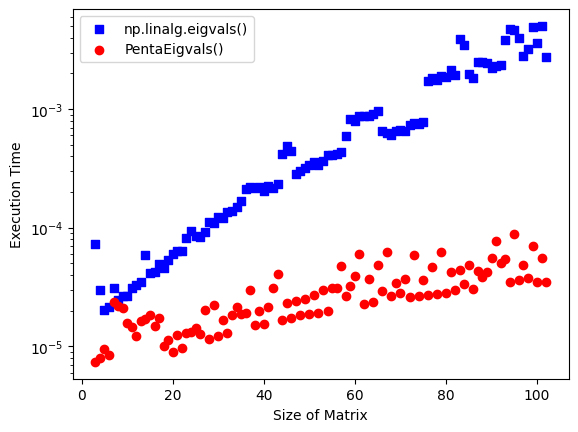

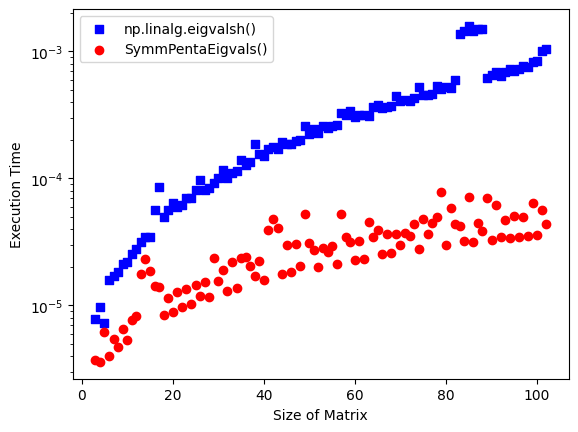

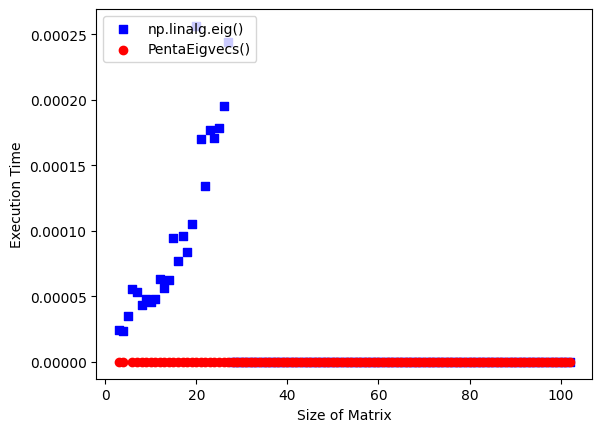

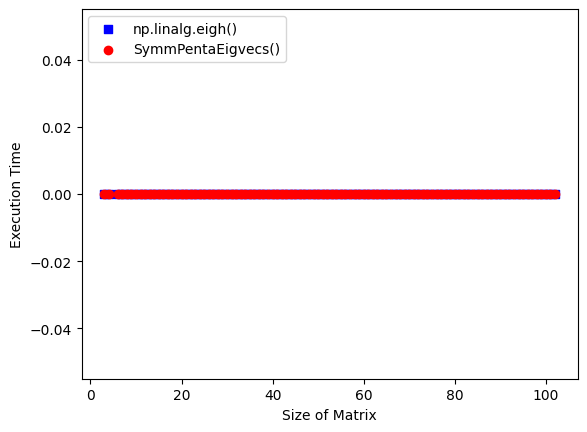

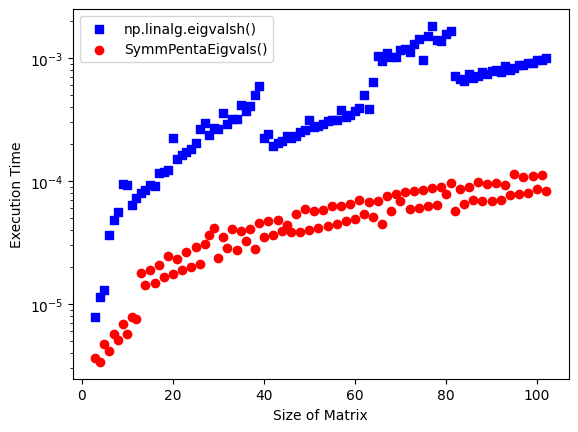

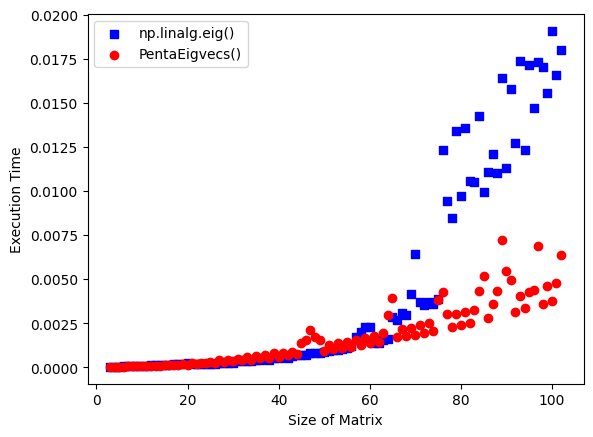

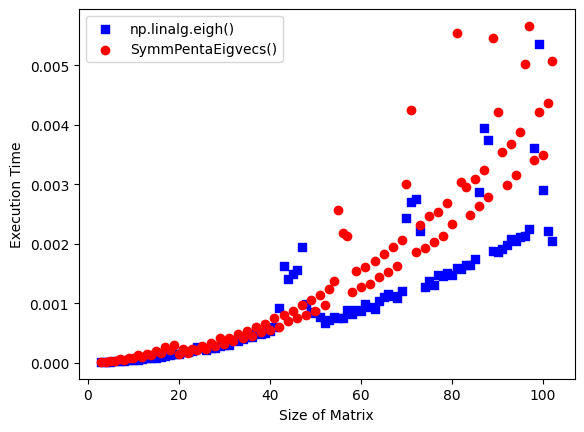